<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/110_intro_prob.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>


(intro_prob_notebook)=
# Introduzione al calcolo delle probabilità

Questo capitolo introduce la teoria delle probabilità, essenziale per la ricerca scientifica. La scienza si basa sull'inferenza induttiva e la probabilità riveste un ruolo cruciale in questo processo. Non possiamo mai essere completamente certi della verità di un'ipotesi o teoria, ma possiamo assegnare un grado di certezza probabilistico ad esse. L'approccio bayesiano utilizza la probabilità per quantificare il grado di fiducia che possiamo attribuire a una proposizione. L'inferenza statistica bayesiana si propone di quantificare la fiducia nell'ipotesi $H$ dopo aver osservato un dato di evidenza $E$. Pertanto, per comprendere l'inferenza statistica bayesiana, è fondamentale conoscere la teoria delle probabilità almeno a livello di elementi di base. Nel presente capitolo, esploreremo le concezioni classica, frequentista e bayesiana della probabilità, le variabili casuali, le funzioni di massa di probabilità, di ripartizione e la simulazione con Python per la legge dei grandi numeri. Prima di procedere con il presente capitolo, è indispensabile leggere l'appendice dedicata a {ref}`combinatorics-notebook`.

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import itertools as it
import math
import scipy.stats as stats
import seaborn as sns
import arviz as az

In [20]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


## Storia della probabilità

L'origine del concetto di probabilità può essere fatta risalire alla corrispondenza tra i matematici francesi Pierre de Fermat e Blaise Pascal, in cui discussero il problema del gioco d'azzardo proposto da Antoine Gombaud, Cavaliere de Méré. Il problema può essere così formulato (si veda la formulazione esatta su [Wikipedia](https://en.wikipedia.org/wiki/Problem_of_points)):

> Immaginiamo due persone che partecipano a un gioco a più round. In ogni round, entrambe le persone hanno la stessa probabilità di vincere. La prima persona che vince sei round consecutivi si aggiudicherà un ricchissimo premio in denaro. Ora, supponiamo che A e B abbiano già disputato sei round, con A che ha vinto cinque volte e B una volta. In quel momento, il gioco è stato interrotto a causa di un temporale. Poiché né A né B hanno raggiunto le sei vittorie, anziché assegnare il premio a uno di loro, hanno deciso di dividerlo. Ma qual è il modo più equo per farlo?

La discussione tra Fermat e Pascal ha portato alla formalizzazione dell'utilizzo della matematica per risolvere questo problema. In sostanza, una soluzione proposta consiste nel considerare le probabilità di vincita di ciascun giocatore. Ad esempio, se A ha una probabilità del 97% di vincere il premio alla fine e B ha una probabilità del 3%, allora sembrerebbe equo assegnare ad A il 97% del premio.


## Che cos'è la probabilità?

Esistono due punti di vista relativi al significato del concetto di probabilità. 

- Secondo una prostettiva che possiamo chiamare "ontologica", la probabilità è considerata come una proprietà intrinseca del mondo, indipendente dalla nostra esperienza. In questa visione, la probabilità è vista come una caratteristica oggettiva del mondo stesso.
- D'altra parte, la prospettiva "epistemica" vede la probabilità come una misura della nostra conoscenza del mondo anziché una proprietà oggettiva. Questa visione soggettiva della probabilità dipende dalla nostra conoscenza e dal nostro punto di vista.

### Interpretazione classica

La prima definizione di probabilità è stata proposta da Pierre-Simon Laplace (1749-1827), che si è avvalso del calcolo combinatorio. Secondo Laplace, la probabilità $P$ di un evento è definita come il rapporto tra il numero di casi in cui l'evento si verifica e il numero totale di casi possibili. In questa definizione, un evento è qualcosa a cui è possibile assegnare un valore di verità, ovvero qualcosa che può essere vero o falso. Ad esempio, la probabilità di ottenere un 3 in un lancio di un singolo dado è 1/6 ≃ 0.17, poiché c'è un solo caso favorevole (il lancio ha prodotto un 3) su sei casi possibili (i numeri da 1 a 6). In modo simile, la probabilità di estrarre un asso da un mazzo di 54 carte (52 figure e 2 jolly) è 4/54 ≃ 0.074, poiché ci sono quattro assi nel mazzo. Tuttavia, questa definizione è insoddisfacente in quanto si basa sull'assunzione che ogni evento sia equiprobabile, il che non è sempre vero. Inoltre, questa definizione è circolare poiché per definire il concetto di probabilità, è necessario prima definire cosa significa che gli eventi siano equiprobabili, e quindi si deve già conoscere il concetto di probabilità.

### Interpretazione frequentista

Un secondo tentativo di definire la probabilità si basa sull'approccio frequentista, che può essere attribuito a molti autori. In questo approccio, la probabilità è definita sulla base delle frequenze osservate dell'occorrenza di un evento. Questo approccio nasce dalla difficoltà di assegnare una probabilità agli eventi assumendo il principio di equiprobabilità, come nel caso dei dadi o delle carte di un mazzo. Sebbene la probabilità di ottenere 3 come risultato del lancio di un dado sia 1/6 se crediamo che il dado sia bilanciato, se così non fosse non potremmo assegnare la stessa probabilità a tutti i risultati possibili. Tuttavia, possiamo stimare le probabilità come la frequenza $f_3$, definita come il rapporto tra il numero di volte in cui un lancio ha prodotto 3 e il numero totale di lanci.

Si osservi che l'osservazione della frequenza $f_3$ è solo un' approssimazione della probabilità, ma l'accuratezza migliora all'aumentare del numero totale di lanci, $N$. In linea di principio, la probabilità di ottenere 3, $P(3)$, è il limite della frequenza $f_3$ quando il numero totale di lanci $N$ tende all'infinito. Tuttavia, questa definizione richiede l'infinita ripetizione di un esperimento, il che può essere impraticabile o impossibile in molti casi. Inoltre, questa definizione assume che gli eventi futuri siano simili agli eventi passati, il che non è sempre garantito.

In entrambi i casi precedenti valgono le seguenti regole: 

- se un evento è impossibile, la sua probabilità è nulla; 
- se un evento è certo, la sua probabilità è 1.

#### Problema del caso singolo

A causa del riferimento frequentista alla frequenza relativa nel lungo periodo, non ha senso parlare della probabilità di eventi che non possono essere ripetuti. Ad esempio, non ha senso parlare della probabilità che Djokovic batta Alcarez nella finale di Wimbledon 2023, o della probabilità che pioverà il giorno di ferragosto a Firenze nel 2023, poiché questi sono eventi specifici e unici. Tuttavia, è comune che le persone non esperte parlino di probabilità o possibilità per questi eventi.

### Interpretazione soggettivista

Una visione più recente è rappresentata dall'approccio della probabilità bayesiana, sviluppato da Thomas Bayes (1701-1761). In questo approccio, la probabilità è considerata una valutazione soggettiva del grado di convinzione che un evento si verifichi. Ad esempio, quando affermo che la probabilità di ottenere un "1" lanciando un dado è di 1/6, sto esprimendo la mia opinione riguardo al dado. Le mie convinzioni possono derivare da diverse fonti: potrei aver fabbricato il dado e sapere che è equo; magari ho visto qualcuno lanciare il dado 1.000 volte e il numero di "1" è stato vicino a 1.000/6; oppure può essere che qualcuno di cui mi fido e che mi dica che il dado ha una probabilità di 1 su 6 di mostrare un "1".

Questa componente "soggettiva" è stata molto criticato dagli studiosi frequentisti, talvolta ingiustamente. Per chiarire, ciò che "soggettivo" significa qui è che la probabilità riflette lo stato della mente di una persona invece dello stato del mondo, ed è quindi del tutto normale che due persone possano avere diverse convinzioni riguardo allo stesso evento. Tuttavia, ciò non significa che la probabilità sia arbitraria, poiché le convinzioni sono sottoposte ai vincoli degli assiomi della probabilità e alla condizione che la persona che possiede tali convinzioni sia razionale. Pertanto, se due persone sono esposte alle stesse informazioni, dovrebbero formare convinzioni simili, sebbene probabilmente non identiche, riguardo all'evento.

L'interpretazione soggettiva funziona perfettamente bene con eventi singoli, poiché è possibile avere una convinzione riguardo a se pioverà in un giorno particolare o riguardo a un risultato sportivo specifico.

```{admonition} Nota
Per chi desidera approfondire, un'introduzione molto leggibile alle tematiche della definizione della probabilità nella storia della scienza è fornita nel primo capitolo del testo *Bernoulli's fallacy* {cite:p}`clayton2021bernoulli`.
```

## Calibrare una convinzione soggettiva

Per rappresentare la propria convinzione mediante le probabilità, è necessario assegnare un valore non nullo a ogni risultato plausibile di un evento. Questo è stato il compito dei scommettitori per molto tempo. Infatti, gran parte dello sviluppo nel campo della probabilità riguarda la creazione di scommesse equilibrate. Il processo di assegnare probabilità ai risultati di un evento secondo la propria convinzione è chiamato *calibrazione*. Ad esempio, consideriamo tre possibili risultati per il tempo di domani: soleggiato, nuvoloso e piovoso.

Per calibrare la mia convinzione, considero inizialmente una scommessa di 10 euro con un guadagno di (a) 30 euro per "soleggiato", (b) 30 euro per "nuvoloso" e (c) 30 euro per "piovoso". Su quale risultato scommetteresti durante l'estate a Firenze? Io scommetterei su "soleggiato" (per ovvi motivi). Ciò significa che porre P(soleggiato) = P(nuvoloso) = P(piovoso) = 1/3 non riflette bene la mia convinzione.

Consideriamo ora una scommessa con un guadagno di (a) 20 euro per "soleggiato", (b) 30 euro per  "nuvoloso" e (c) 60 euro per "piovoso". Questo rifletterebbe la convinzione che ci sia una probabilità del 50% di una giornata di sole, una probabilità del 33.33% di una giornata nuvolosa e una probabilità del 16.67% di una giornata piovosa. Accetteresti questa scommessa? Questo è un miglioramento rispetto alla situazione precedente, ma direi comunque che "soleggiato" continua ad essere una buona scommessa, suggerendo che la probabilità del 50% per questo evento è troppo bassa. L'idea è di continuare iterando fino a quando è difficile considerare (a), (b) o (c) come un chiaro favorito per la scommessa. Per me, a lugio 2023 a Firenze, questo si tradurrebbe in qualcosa come (a) 10 euro per "soleggiato", (b) 980 euro per "nuvoloso" e (c) 980 euro per "piovoso", corrispondente alle probabilità di 0.98 per "soleggiato", 0.01 per "nuvoloso" e 0.01 per "piovoso".

Un modo alternativo per comprendere la calibrazione, diverso dall'analogia del gioco d'azzardo, è considerare quanto più probabile è una giornata di sole rispetto a una giornata non soleggiata e quante volte una giornata nuvolosa è più probabile rispetto a una giornata piovosa. Questo approccio può essere utilizzato per stabilire le probabilità soggettive di eventi.

Per esempio, se consideriamo una giornata di sole come due volte più probabile di una giornata non soleggiata, assegneremo una probabilità del 0.6667 (ovvero 2/3) per una giornata di sole. Successivamente, se riteniamo che una giornata nuvolosa sia tre volte più probabile di una giornata piovosa, assegneremo una probabilità del 0.25 (ovvero 1/4 di 0.3333) per una giornata nuvolosa e una probabilità del 0.0833 (ovvero 1/12 di 0.3333) per una giornata piovosa. 

In questo modo, utilizzando la logica delle frequenze relative, possiamo attribuire probabilità soggettive ai diversi eventi in base alle nostre convinzioni personali, anche se non abbiamo dati statistici precisi a nostra disposizione.

Un modo alternativo per pensare alla calibrazione, in alternativa all'analogia del gioco d'azzardo, è quello di considerare quante volte una giornata di sole è più probabile rispetto a una giornata nuvolosa e quante volte una giornata nuvolosa è più probabile rispetto a una giornata piovosa. Ad esempio, potrei considerare una giornata di sole due volte più probabile di una giornata nuvolosa, il che mi darebbe una probabilità del 0.6667 per una giornata di sole. Poi, se penso anche che una giornata nuvolosa è tre volte più probabile di una giornata piovosa, assegnerei una probabilità del 0.3333% × 3 / 4 = 0.25 per una giornata nuvolosa e una probabilità del 0.3333% × 1 / 4 = 0.0833 per una giornata piovosa.

In questo modo, utilizzando la logica delle frequenze relative, possiamo attribuire probabilità soggettive ai diversi eventi in base alle nostre convinzioni personali, anche se non abbiamo dati statistici precisi a nostra disposizione. Il processo di calibrare la propria convinzione svolge un ruolo chiave nell'analisi dei dati bayesiana, in particolare nella formulazione di una distribuzione di probabilità a priori.

## Variabili casuali e probabilità di un evento

Esaminiamo qui di seguito alcuni concetti di base della teoria delle probabilità.

### Eventi e probabilità

Consideriamo l'esperimento casuale corrispondente al lancio di una moneta. Nella teoria delle probabilità il risultato "testa" nel lancio di una moneta è chiamato *evento*. Un evento corrisponde ad uno stato del mondo che si verifica oppure no. Ad esempio, possiamo indicare con $Y = 1$ l'evento in cui il lancio della moneta produce il risultato "testa". La probabilità di un evento, indicata con $P(Y)$, rappresenta la credibilità o la proporzione di volte in cui ci si aspetta che l'evento $Y$ si verifichi, considerando molte ripetizioni indipendenti dell'esperimento casuale a lungo termine. Ad esempio, per una moneta equilibrata, la probabilità dell'evento "il risultato del lancio della moneta è testa" è scritta come $P(Y = 1) = 0.5.$ Questo significa che ci si aspetta che il risultato "testa" si verifichi con una probabilità del 50% nei lanci ripetuti di una moneta equilibrata.

Se lanciamo una moneta equilibrata, allora la probabilità di ottenere "testa" ($Y=1$) deve essere uguale alla probabilità di ottenere "croce" ($Y=0$), entrambe pari a $0.5$. I due eventi, $Y=1$ e $Y=0$, sono "mutuamente esclusivi", il che significa che non possono verificarsi contemporaneamente: $P(Y=1 ; \text{e} ; Y=0) = 0$. Inoltre, i due eventi sono "esaustivi", il che significa che almeno uno di essi deve verificarsi e non ci sono altre possibilità. In notazione probabilistica, ciò si esprime come $P(Y=1 ; \text{o} ; Y=0) = 1$.

Il connettivo logico "o" ($\lor$) si utilizza per eventi "disgiunti", cioè eventi che non possono verificarsi contemporaneamente (eventi "incompatibili"), e per i quali la probabilità della loro congiunzione è $P(A ; \land ; B) = 0$. D'altro canto, il connettivo logico "e" ($\land$) si utilizza per eventi "congiunti", cioè eventi che possono verificarsi contemporaneamente (eventi "compatibili"), e per i quali la probabilità della loro congiunzione è $P(A ; \land ; B) > 0$. La probabilità del verificarsi congiunto di due eventi $A$ e $B$ può essere denotata in vari modi, come ad esempio $P(A \cap B)$ o $P(A, B)$.

La probabilità di un evento $A$, indicata come $P(A)$, deve essere compresa tra 0 e 1, ovvero $0 \leq P(A) \leq 1$. Un valore di $P(A) = 0$ rappresenta l'evento impossibile, cioè un evento che non può verificarsi mai, mentre un valore di $P(A) = 1$ rappresenta l'evento certo, cioè un evento che si verificherà sempre.

Per denotare la probabilità che l'evento $A$ non si verifichi, possiamo usare la notazione $P(\lnot A)$ o $P(\bar{A})$. Questa probabilità è definita come il complemento dell'evento $A$, quindi $P(\bar{A}) = 1 - P(A)$. In altre parole, la probabilità di non verificarsi dell'evento $A$ è uguale a 1 meno la probabilità che l'evento $A$ si verifichi.

### Spazio campione e risultati possibili

Ogni volta che lanciamo una moneta, otteniamo un risultato specifico nel mondo reale. Tuttavia, possiamo anche immaginare quali risultati alternativi sarebbero potuti accadere. Questo tipo di ragionamento, chiamato controfattuale, è fondamentale per comprendere la teoria delle probabilità e l'inferenza statistica.

Supponiamo che la variabile $Y$ rappresenti il risultato di uno specifico lancio di una moneta in un dato momento, non il risultato di un lancio generico di una moneta. In questo contesto, chiamiamo $Y$ una *variabile casuale*, il che significa che i suoi valori non possono essere predetti con certezza in anticipo. Se la moneta è equilibrata, cioè ha probabilità uguale di ottenere testa o croce, allora la probabilità che il lancio produca "testa" è del 50%, mentre la probabilità che produca "croce" è anch'essa del 50%. Per semplificare i calcoli e l'analisi, nella teoria della probabilità, le variabili casuali vengono generalmente rappresentate da valori numerici. Ad esempio, per il lancio specifico della moneta in questione, possiamo assegnare il valore 1 alla variabile casuale $Y$ se esce testa, e il valore 0 se esce croce.

Le variabili casuali possono essere di due tipi: discrete o continue. Una variabile casuale discreta può assumere solo un numero finito o numerabile di valori distinti, come ad esempio i risultati di un test psicometrico con punteggi specifici su una scala Likert. In questo caso, i valori possibili della variabile casuale sono rappresentati da $x_1, \dots, x_n$, corrispondenti agli eventi $E_1, \dots, E_n$, che si verificano con le rispettive probabilità $p_1, \dots, p_n$. D'altra parte, una variabile casuale continua può assumere un numero infinito di valori all'interno di un intervallo specifico. Un esempio di variabile casuale continua è la distanza tra due punti, poiché può variare in modo continuo tra un valore minimo e massimo all'interno dell'intervallo considerato.

L'insieme $\Omega$, noto come spazio campione o sample space, rappresenta tutti i possibili risultati che una variabile casuale può assumere. Possiamo immaginare lo spazio campione come un'urna contenente una pallina per ogni risultato possibile di un esperimento casuale. Ogni pallina ha scritto il valore corrispondente alla variabile casuale. Un esperimento casuale corrisponde all'osservazione di uno specifico risultato all'interno dello spazio campione.

Un esempio di esperimento casuale è il lancio di un dado. Supponiamo di essere interessati all'evento "il lancio del dado produce un numero dispari". Un evento rappresenta la selezione di un sottoinsieme dello spazio campione, che in questo caso è l'insieme dei risultati possibili del dado: ${1, 2, 3, 4, 5, 6}$. L'evento "dispari" seleziona i risultati $\{1, 3, 5\}$. Se al lancio del dado esce il numero 3, possiamo dire che si è verificato l'evento "dispari". Ma è importante notare che l'evento "dispari" si sarebbe comunque verificato anche se fosse uscito il numero 1 o il numero 5, poiché entrambi sono inclusi nell'insieme degli esiti dispari.

### Variabili casuali multiple

Le variabili casuali non esistono in modo isolato. Immaginiamo di iniziare con una singola variabile casuale $Y$, che rappresenta il risultato di un lancio di una moneta equilibrata. Ora, supponiamo di lanciare la stessa moneta tre volte. I risultati di ciascuno dei tre lanci possono essere rappresentati da tre diverse variabili casuali, ad esempio $Y_1$, $Y_2$ e $Y_3$. Ognuno di questi lanci può essere considerato indipendente, il che significa che il risultato di un lancio non dipende dal risultato degli altri lanci. Per ogni variabile casuale $Y_n$, con $n \in 1:3$, avremo ancora che $P(Y_n = 1) = 0.5$ e $P(Y_n = 0) = 0.5$, poiché stiamo lanciando una moneta equilibrata e quindi la probabilità di ottenere testa o croce in ogni singolo lancio è sempre del 50%.

Le variabili casuali possono essere combinate utilizzando le operazioni aritmetiche. Se consideriamo tre lanci di una moneta equilibrata (o, in modo equivalente, un lancio di tre monete equilibrate), possiamo definire tre variabili casuali $Y_1$, $Y_2$ e $Y_3$, ognuna rappresentante il risultato di un singolo lancio. Inoltre, possiamo definire una nuova variabile casuale $Z$, che rappresenta la somma dei risultati dei tre lanci:

$$
Z = Y_1 + Y_2 + Y_3.
$$

È importante notare che $Z$ sarà una variabile casuale discreta, poiché le modalità possibili sono costituite solo da numeri interi:

$$
\mathbb{Z} = \dots, -2, -1, 0, 1, 2, \dots
$$

(sec-fun-mass-prob)=
## Funzione di massa di probabilità

La *distribuzione di probabilità* è una caratteristica fondamentale di una variabile casuale e rappresenta l'insieme delle probabilità dei suoi diversi valori. Quando ci riferiamo alle distribuzioni di probabilità delle variabili casuali discrete, utilizziamo la notazione $P(\cdot)$, mentre per le variabili casuali continue utilizziamo la notazione $p(\cdot)$ per indicare la densità di probabilità.

Il supporto di una variabile casuale è l'insieme di tutti i valori che essa può assumere ed è un elemento importante della sua distribuzione di probabilità. Il supporto può essere finito, come nel caso di una variabile casuale discreta che rappresenta il numero di facce uscite su un dado standard a sei facce, con supporto $\{1, 2, 3, 4, 5, 6\}$, oppure infinito, come nel caso di una variabile casuale gaussiana che ha un supporto sull'intera retta reale. 

È utile disporre di una funzione che assegni una probabilità a ciascun possibile valore di una variabile casuale. Tuttavia, ciò è possibile solo nel caso in cui la variabile casuale sia discreta, come definito nel paragrafo precedente. Per le variabili continue, invece, si utilizza la densità di probabilità, che rappresenta la probabilità di una variabile casuale di assumere valori in un certo intervallo.

Consideriamo ora un esperimento casuale in cui lanciamo due dadi equilibrati a 6 facce. Definiamo la variabile casuale $Z = D_1 + D_2$ come la somma dei punti ottenuti dai due lanci. Esaminiamo lo spazio campione di questa variabile casuale:

In [21]:
r = range(1, 7)
sample = [(i, j) for i in r for j in r]
print(sample)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]


In corrispondenza del primo punto dello spazio campione elencato sopra, la variabile casuale $Z$ assume valore 2; corrispondenza del secondo punto assume valore 3, e così via.

Le sequenze come (1, 1), (1, 2), ecc. sono chiamate "eventi elementari", ovvero corrispondono a possibili esiti dell'esperimento casuale. Lo spazio campione di questo esperimento casuale è costituito da 36 eventi elementari:

In [4]:
len(sample)

36

L'evento $Z = u$, con $u$ compreso tra 2 e 12, è un "evento composto", poiché può essere costituito da più eventi elementari. Ad esempio, l'evento $Z = 2$ è composto da un unico evento elementare: (1, 1); l'evento $Z = 3$ è composto da due eventi elementari: (1, 1) e (1, 2); e così via.

Nel nostro esempio costruito usando Python, ogni elemento della lista `sample` è una lista di due elementi. Per trovare il valore della variabile casuale $Z$, quindi, dobbiamo sommare i due elementi di ciascuna lista. Nel primo punto campione (1, 1), il valore di $Z$ è 2:

In [5]:
sum(sample[0])

2

In corrispondenza dell'ultimo punto dello spazio campione (6, 6), il valore di $Z$ è 12:

In [6]:
sum(sample[35])

12

Creiamo ora la lista `z` che memorizza il valore assunto dalla variabile casuale $Z$ in corrispondenza di ciascun punto dello spazio campione:

In [7]:
z = [sum(point) for point in sample]
z

[2,
 3,
 4,
 5,
 6,
 7,
 3,
 4,
 5,
 6,
 7,
 8,
 4,
 5,
 6,
 7,
 8,
 9,
 5,
 6,
 7,
 8,
 9,
 10,
 6,
 7,
 8,
 9,
 10,
 11,
 7,
 8,
 9,
 10,
 11,
 12]

Nel nostro esperimento, contiamo quante volte si presenta ciascun possibile valore $Z$ nello spazio campione. Per chiarire cosa viene eseguito nella *list comprehension*, stampiamo l'oggetto `event` in ciascuna iterazione del ciclo `for`.

In [8]:
for i in range(2, 13):
    event = [roll for roll in sample if sum(roll) == i]
    print(event)
    print(f"z = {i} : {len(event)} / {len(sample)}")

[(1, 1)]
z = 2 : 1 / 36
[(1, 2), (2, 1)]
z = 3 : 2 / 36
[(1, 3), (2, 2), (3, 1)]
z = 4 : 3 / 36
[(1, 4), (2, 3), (3, 2), (4, 1)]
z = 5 : 4 / 36
[(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)]
z = 6 : 5 / 36
[(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)]
z = 7 : 6 / 36
[(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)]
z = 8 : 5 / 36
[(3, 6), (4, 5), (5, 4), (6, 3)]
z = 9 : 4 / 36
[(4, 6), (5, 5), (6, 4)]
z = 10 : 3 / 36
[(5, 6), (6, 5)]
z = 11 : 2 / 36
[(6, 6)]
z = 12 : 1 / 36


La variabile casuale $Z$ assume il valore 2 in un solo punto dello spazio campione: (1, 1); assume il valore 3 in corrispondenza di due punti dello spazio campione: (1, 2) e (2, 1); e così via.

Calcoliamo infine la *proporzione* di volte in cui ciascun valore $Z$ si presenta nello spazio campione, ovvero la frazione di volte in cui un certo valore di $Z$ compare rispetto al numero totale di punti nello spazio campione: 1/36, 2/36, ecc.

In [9]:
px = []

for i in range(2, 13):
    event = [roll for roll in sample if sum(roll) == i]
    px.append(len(event) / len(sample))

print(np.array(px).round(3))

[0.028 0.056 0.083 0.111 0.139 0.167 0.139 0.111 0.083 0.056 0.028]


È possibile visualizzare il risultato ottenuto mediante una lista.

In [10]:
list(zip(list(range(2, 13)), px))

[(2, 0.027777777777777776),
 (3, 0.05555555555555555),
 (4, 0.08333333333333333),
 (5, 0.1111111111111111),
 (6, 0.1388888888888889),
 (7, 0.16666666666666666),
 (8, 0.1388888888888889),
 (9, 0.1111111111111111),
 (10, 0.08333333333333333),
 (11, 0.05555555555555555),
 (12, 0.027777777777777776)]

Oppure, in alternativa, possiamo generare un DataFrame.

In [11]:
df = pd.DataFrame()
df["Z"] = np.array(range(2, 13))
df["Probability"] = px

df.round(3)

,Z,Probability
0,2,0.028
1,3,0.056
2,4,0.083
3,5,0.111
4,6,0.139
5,7,0.167
6,8,0.139
7,9,0.111
8,10,0.083
9,11,0.056


La funzione $p_Z$ così ottenuta associa a ciascun valore $u$ della variabile casuale $Z$ la probabilità dell'evento $Z = u$.

$$
\begin{array}{rclll}
p_Z(2) & =&  1/36 \\
p_Z(3) & = & 2/36 \\
p_Z(4) & = & 3/36 \\
p_Z(5) & = & 4/36 \\
p_Z(6) & = & 5/36 \\
p_Z(7) & = & 6/36 \\
p_Z(8) & = & 5/36 \\
p_Z(9) & = & 4/36 \\
p_Z(10) & = & 3/36 \\
p_Z(11) & = & 2/36 \\
p_Z(12) & = & 1/36 \\
\end{array}
$$

In questo esercizio abbiamo calcolato le probabilità dividendo il numero di punti dello spazio campione che corrispondono allo stesso valore $D_1 + D_2$ per il numero totale di punti che costituiscono lo spazio campione. Queste probabilità sono convenzionalmente indicate come $P_Z(z) = P(Z = z)$. L'espressione $P_Z(z)$ si legge come "la probabilità che la variabile casuale $Z$ assuma il valore $z$". La funzione definita sopra è chiamata *funzione di massa di probabilità* della variabile casuale $Z$. 

Ogni variabile casuale discreta ha un'unica funzione di massa di probabilità. Questa funzione di massa di probabilità soddisfa le proprietà:

- $0 \leq P(Z=z) \leq 1$,
- $\sum_{z \in Z} P(Z=z) = 1$.

Se $A$ è un sottoinsieme della variabile casuale $Z$, denotiamo con $P_Z(A)$ la probabilità assegnata ad $A$ dalla distribuzione $P_Z$. Utilizzando la distribuzione di probabilità $P_Z$, possiamo determinare la probabilità di ciascun sottoinsieme $A \subset Z$ come:

$$P_Z(A) = \sum_{z \in A} P(Z = z).$$

Ad esempio, considerando nuovamente la variabile casuale $Z$ definita dall'esperimento del lancio di due dadi, la probabilità che $Z$ sia un numero dispari è:

$$
\begin{align}
P(\text{Z è un numero dispari}) &= P_Z(Z = 3) + P_Z(Z = 5) + P_Z(Z = 7) + P_Z(Z = 11)\\
&= \frac{2}{36} + \frac{4}{36} + \frac{6}{36} + \frac{4}{36} + \frac{2}{36}\\
&= \frac{1}{2}.
\end{align}
$$

### Funzione di ripartizione

Nel caso di una variabile casuale discreta $X$, possiamo calcolare la probabilità che $X$ non superi un determinato valore $x$ utilizzando la sua *funzione di ripartizione*. Poiché $X$ assume valori discreti, possiamo cumulare le probabilità tramite una somma:

$$
F(x_k) = P(X \leq x_k) = \sum_{x \leq x_k} P(x).
$$

La funzione di ripartizione di una variabile casuale $X$ associa a ogni valore $x$ la probabilità che la variabile casuale assuma un valore minore o uguale a $x$. In altre parole, la funzione di ripartizione $F(x)$ ci fornisce la probabilità che $X \leq x$. 

Ad esempio, consideriamo una variabile casuale discreta che rappresenta il numero di lanci di testa in un certo numero di lanci di una moneta equilibrata. La funzione di ripartizione $F(x)$ di questa variabile casuale ci dà la probabilità che il numero di lanci di testa sia inferiore o uguale a un certo valore $x$. In questo caso, la somma $\sum_{k=0}^{x} P(k)$ rappresenta la probabilità di ottenere fino a $x$ lanci di testa in una serie di lanci di monete equilibrate.

Per l'esempio relativo al lancio dei due dadi, la funzione di ripartizione della variabile casuale $Z$ è fornita nella tabella seguente.

```{table}
| z   | p(z) | p(z <= k) |
| --- | --- | --------- |
| 2   | 1/36 |  1/16    |
| 3   | 2/36 |  3/16    |
| 4   | 3/36 |  6/16    |
| 5   | 4/36 |  10/16   |
| 6   | 5/36 |  15/16   |
| 7   | 6/36 |  21/16   |
| 8   | 5/36 |  26/16   |
| 9   | 4/36 |  30/16   |
| 10  | 3/36 |  33/16   |
| 11  | 2/36 |  35/16   |
| 12  | 1/36 |  36/16   |
```

### Trovare la probabilità con una simulazione 

La distribuzione di probabilità che abbiamo calcolato in precedenza per il lancio dei due dadi è corretta, ma esiste anche un altro metodo per ottenere un risultato molto simile tramite una simulazione. Questa consiste nella generazione di un grande numero di ripetizioni dell'esperimento casuale e nell'analisi delle frequenze relative dei risultati ottenuti. In altre parole, simulando l'esperimento molte volte, possiamo approssimare la distribuzione di probabilità empirica, che si avvicina sempre di più alla distribuzione teorica man mano che aumenta il numero di ripetizioni. Questo è un approccio comune in statistica ed è particolarmente utile quando la distribuzione di probabilità teorica non è facilmente calcolabile o è troppo complessa per essere gestita in modo analitico.

Nel capitolo {ref}`intro-python-notebook` abbiamo visto come creare una funzione che ritorna il risultato del lancio di un dado:

In [22]:
def roll_die():
    """
    returns a random int between 1 and 6
    """
    return rng.choice([1, 2, 3, 4, 5, 6])

Possiamo ora definire una funzione che ritorna la somma dei punti prodotti dal lancio di due dadi. La funzione ha come argomento il numero di ripetizioni di questo esperimento casuale.

In [24]:
def roll_two_dice(n):
    """
    returns a random int between 2 and 12
    """
    rolls = []
    for i in range(n):
        two_dice = roll_die() + roll_die()
        rolls.append(two_dice)
    return rolls


Eseguiamo 100,000 ripetizioni dell'esperimento casuale e memorizzo i risultati ottenuti.

In [25]:
nrolls = 100000
res = roll_two_dice(nrolls)
print(*res[1:50])

6 7 7 5 11 10 9 7 7 5 11 7 9 6 3 10 7 7 5 10 4 9 11 10 5 6 5 6 11 8 9 8 4 8 5 6 5 6 11 4 9 6 7 8 11 9 4 9 6


Definiamo un DataFrame con al suo interno la variabile `y` che corrisponde ai risultati delle 10,000 ripetizioni dell'esperimento casuale.

In [26]:
df = pd.DataFrame()
df["y"] = res 

Ora, utilizzeremo il metodo `value_counts()`, che può essere applicato a un DataFrame, come abbiamo visto nel capitolo {ref}`freq-distr-notebook`, per trovare le frequenze assolute di ciascuno dei possibili risultati dell'esperimento casuale (cioè, 2, 3, ..., 12). Dividendo per il numero totale delle ripetizioni, otterremo una stima empirica della probabilità. Si noti che i risultati saranno simili a quelli teorici ottenuti in precedenza.

In [27]:
abs_freqs = df["y"].value_counts().sort_index()
px = abs_freqs / nrolls
list(zip(list(range(2, 13)), px))

[(2, 0.02719),
 (3, 0.05601),
 (4, 0.08311),
 (5, 0.11006),
 (6, 0.13845),
 (7, 0.16786),
 (8, 0.13939),
 (9, 0.11085),
 (10, 0.08386),
 (11, 0.05536),
 (12, 0.02786)]

### Il problema del compleanno

Consideriamo ora il famoso paradosso del compleanno, anche noto come problema del compleanno, che è un curioso risultato della teoria della probabilità introdotto da Richard von Mises nel 1939. Questo paradosso afferma che la probabilità che almeno due persone in un gruppo abbiano la stessa data di compleanno è notevolmente più alta di quanto ci si potrebbe aspettare intuitivamente. Ad esempio, in un gruppo di soli 23 persone, la probabilità che almeno due di loro abbiano lo stesso compleanno è di circa il 51%, mentre con 30 persone questa probabilità supera il 70% e con 50 persone raggiunge addirittura il 97%. Questo esempio mette in evidenza come le intuizioni umane possano essere fuorvianti quando si tratta di calcolare la probabilità di eventi rari o improbabili.

La soluzione matematica al problema del compleanno è data dalla seguente formula:

$$
P(p)=1-{\frac  {364!}{365^{{p-1}}(365-p)!}},
$$

dove $P(p)$ rappresenta la probabilità che almeno due persone abbiano lo stesso compleanno in un gruppo di $p$ persone. La spiegazione dettagliata può essere trovata su Wikipedia o in altre fonti di teoria delle probabilità.

Tuttavia, esiste anche un metodo più semplice per risolvere il problema del compleanno, che consiste nell'utilizzare una simulazione. Questo approccio coinvolge la scrittura di codice per simulare un gran numero di gruppi di persone e controllare quanti di essi hanno almeno due persone con la stessa data di compleanno. Il codice di esempio può essere trovato nel libro "Introduction to Computation and Programming Using Python" di {cite:t}`guttag2021introduction` e in altre risorse. 

In [29]:
def same_date(num_people, num_same):
    # initialize list from 0 to 365
    possible_dates = range(366)
    # list of zeros
    birthdays = [0] * 366
    # increments by 1 the days corresponding to to the randomly chosen
    # birthdays of num_people individuals
    for p in range(num_people):
        birth_date = rng.choice(possible_dates)
        birthdays[birth_date] += 1
    # True if at least one day records a number of birthdays >= num_same;
    # False otherwise
    return max(birthdays) >= num_same


def birthday_prob(num_people, num_same, num_trials):
    num_hits = 0
    # repeat the simulation num_trials times
    for t in range(num_trials):
        # if same_date() returns True, then increment num_hits by 1
        if same_date(num_people, num_same):
            num_hits += 1
    return num_hits / num_trials


for num_people in [10, 23, 30]:
    print(
        "For",
        num_people,
        "est. prob. of a shared birthday is",
        birthday_prob(num_people, 2, 10000),
    )
    numerator = math.factorial(366)
    denom = (366**num_people) * math.factorial(366 - num_people)
    print("Actual prob. for N = 100 =", 1 - numerator / denom)


For 10 est. prob. of a shared birthday is 0.1186
Actual prob. for N = 100 = 0.1166454118039999
For 23 est. prob. of a shared birthday is 0.5129
Actual prob. for N = 100 = 0.5063230118194599
For 30 est. prob. of a shared birthday is 0.7052
Actual prob. for N = 100 = 0.7053034120089917


Si noti che sia la formula che la simulazione sono approssimazioni, poiché entrambe assumono che i compleanni siano egualmente probabili in tutti i giorni dell'anno, cosa che non è verificata nella realtà, come mostrato nella figura successiva.

```{image} images/birthdays.png
:height: 420px
:align: center
```

In questo caso, così come in tutti gli altri in cui si utilizzano modelli probabilistici per descrivere fenomeni empirici, è importante tenere presente che la risposta ottenuta è plausibile solo se le assunzioni fatte nei modelli riflettono correttamente i vincoli e le caratteristiche del mondo reale. Le probabilità e le previsioni derivate da tali modelli sono valide solo nella misura in cui le ipotesi sottostanti sono realistiche e pertinenti al contesto specifico.


### La legge dei grandi numeri

Per comprendere come la stima della probabilità di un evento $P(Y=y)$ cambia al variare del numero di ripetizioni di un esperimento casuale, possiamo registrare tale stima per ogni numero di ripetizioni $m$ da 1 a $M$. Questo processo ci consente di ottenere una rappresentazione empirica della legge dei grandi numeri.

La *legge dei grandi numeri* è un teorema fondamentale della teoria delle probabilità che stabilisce che, all'aumentare del numero di ripetizioni di un esperimento casuale, la media dei risultati ottenuti tende a convergere al valore teorico atteso della variabile casuale. In altre parole, man mano che si effettuano sempre più prove dell'esperimento, la stima empirica della media dei risultati si avvicina sempre di più al valore reale previsto dalla teoria.

Questo fenomeno implica che, con un numero sufficientemente grande di ripetizioni, la probabilità stimata di un evento diventa sempre più accurata e si avvicina alla probabilità teorica. Ciò offre una fondamentale garanzia di coerenza tra le osservazioni empiriche e le leggi probabilistiche teoriche.

La legge dei grandi numeri è un pilastro essenziale della statistica e dell'inferenza, poiché fornisce una base solida per l'uso dei modelli probabilistici per descrivere fenomeni reali. Essa sottolinea che, nonostante le fluttuazioni casuali che possono verificarsi nelle singole prove, la tendenza generale di un numero sufficientemente grande di prove rifletterà fedelmente le leggi probabilistiche sottostanti.

Formalmente, per una sequenza di variabili casuali indipendenti $X_1, X_2, \ldots, X_n$ con media $\mu$, la legge dei grandi numeri stabilisce che:

$$
\lim_{{n \to \infty}} P\left(\left|\frac{X_1 + X_2 + \ldots + X_n}{n} - \mu\right| < \epsilon\right) = 1,
$$

dove $\epsilon$ è un valore positivo arbitrariamente piccolo e $P(\cdot)$ rappresenta la probabilità. Questo risultato implica che, con un numero sufficientemente elevato di ripetizioni, la stima empirica della media campionaria si avvicina sempre di più al valore atteso teorico, consentendo di ottenere conclusioni affidabili sulla probabilità degli eventi considerati.

Nel seguente codice, effettuiamo una simulazione di una serie di lanci di un dado a sei facce. Generiamo casualmente numeri interi compresi tra 1 e 6 per simulare ciascun lancio. Teniamo traccia della somma cumulativa dei lanci e del numero di lanci effettuati. Ad ogni passaggio, calcoliamo il valore medio dividendo la somma cumulativa per il numero di lanci. Infine, visualizziamo il valore medio dopo ogni lancio, insieme a una linea orizzontale che indica il valore atteso di 3.5, che rappresenta la media dei punti per un dado a sei facce.


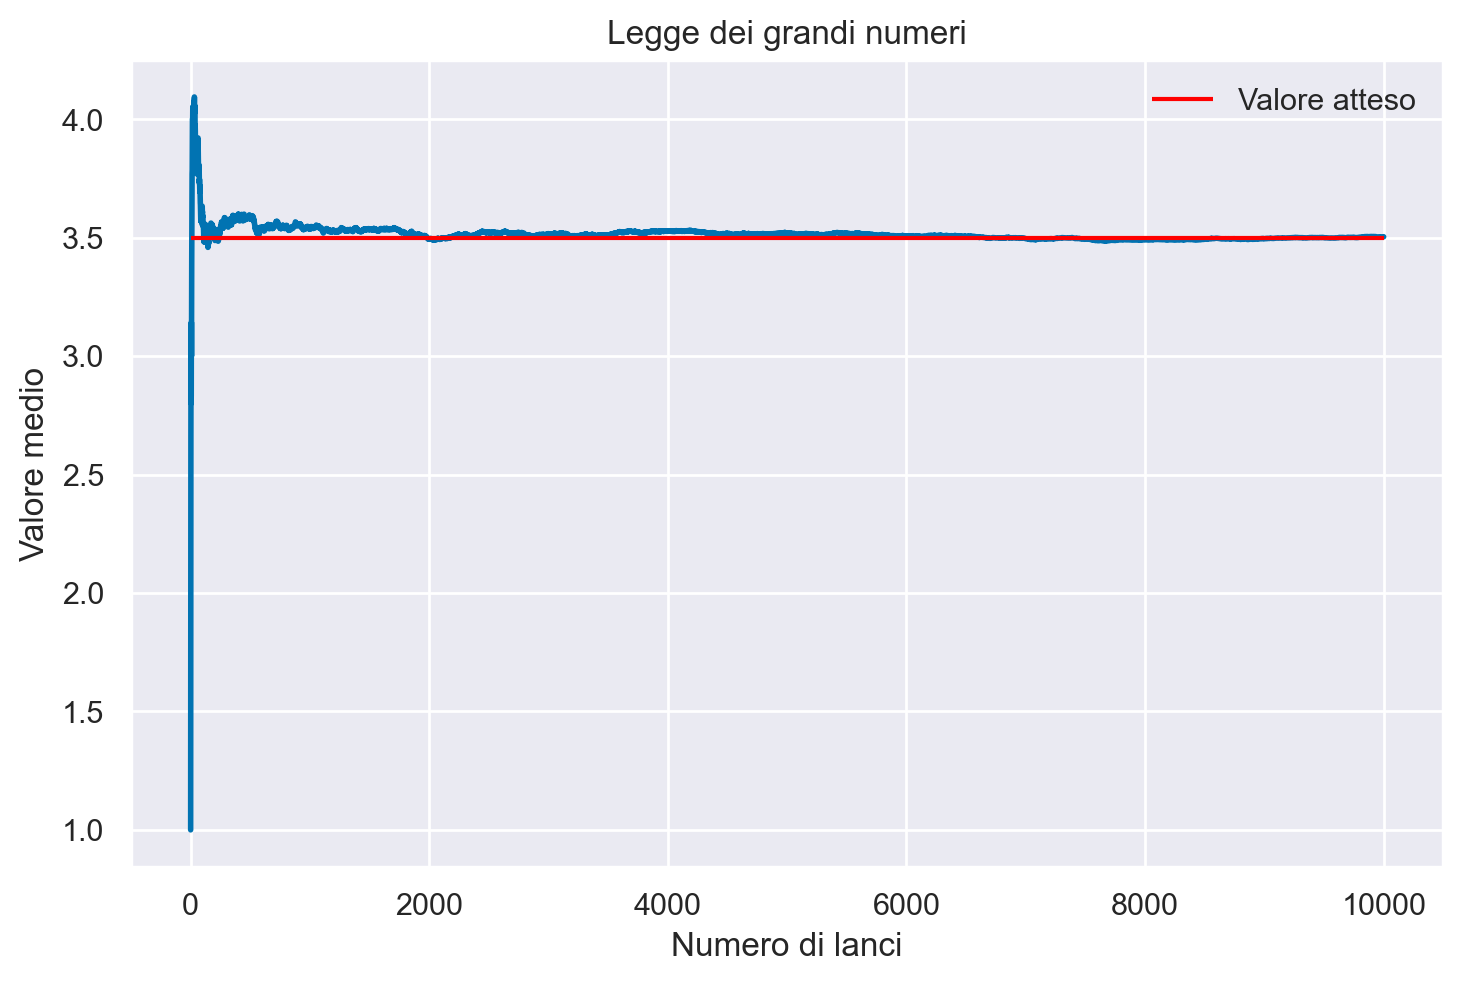

In [30]:
def simulate_dice_rolls(num_rolls):
    """Simulate dice rolls and return the average value for each roll."""
    total = 0
    averages = []
    for i in range(1, num_rolls + 1):
        roll = roll_die()
        total += roll
        averages.append(total / i)
    return averages


def plot_dice_rolls(averages, num_rolls):
    """
    Plot the average value after each dice roll.
    """
    x = range(1, num_rolls + 1)
    plt.plot(x, averages, linewidth=2)
    plt.hlines(y=3.5, xmin=0, xmax=num_rolls, color="red", label="Valore atteso")
    plt.xlabel("Numero di lanci")
    plt.ylabel("Valore medio")
    plt.title("Legge dei grandi numeri")
    plt.legend()
    plt.show()


if __name__ == "__main__":
    num_rolls = 10000
    averages = simulate_dice_rolls(num_rolls)
    plot_dice_rolls(averages, num_rolls)


## Commenti e considerazioni finali

In questo capitolo abbiamo esplorato i fondamenti della teoria delle probabilità. Abbiamo iniziato costruendo lo spazio campione per esperimenti casuali e abbiamo introdotto le proprietà di base della probabilità. Abbiamo visto come assegnare probabilità agli eventi definiti su uno spazio campione discreto e come utilizzare le funzioni di ripartizione e di massa di probabilità per specificare le probabilità di una variabile casuale. Abbiamo utilizzato strumenti del linguaggio Python per calcolare le probabilità, come liste, cicli, *list comprehension* e funzioni del modulo `itertools`.

Inoltre, abbiamo esplorato il concetto di variabile casuale, che rappresenta una quantità che assume valori casuali. Le variabili casuali possono essere combinate utilizzando operazioni aritmetiche, e abbiamo visto come calcolare la probabilità di eventi composti. Abbiamo anche introdotto il concetto di simulazione, che è un metodo utile per approssimare distribuzioni di probabilità empiriche quando le soluzioni analitiche non sono praticabili.

Tuttavia, è importante sottolineare che tutti i modelli, inclusi quelli derivati dalle simulazioni, sono solo un'approssimazione della realtà e possono essere influenzati da semplificazioni e limitazioni dei dati disponibili. Pertanto, è fondamentale esercitare cautela nell'interpretazione dei risultati dei modelli e comprendere le assunzioni alla base delle analisi. Come ha sottolineato George Box, "Tutti i modelli sono sbagliati, ma alcuni sono utili". Questa citazione ci ricorda che i modelli possono essere strumenti preziosi per comprendere e analizzare fenomeni complessi, ma è essenziale essere consapevoli dei loro limiti e delle possibili fonti di errore.

La teoria delle probabilità è una disciplina fondamentale per la statistica e ha una vasta gamma di applicazioni in vari campi, inclusa la psicologia. La capacità di comprendere e manipolare le probabilità ci consente di prendere decisioni informate in situazioni incerte e di sviluppare modelli e previsioni affidabili. Con una solida comprensione delle nozioni di base della probabilità e delle sue applicazioni pratiche, siamo in grado di affrontare una vasta gamma di problemi e prendere decisioni informate basate sulla probabilità dei risultati possibili.

## Esercizio

Utilizzando il file condiviso su Google Drive, ciascuno studente inserirà il proprio nome e il compleanno nel formato specificato. Successivamente, il file Excel contenente i dati verrà importato in Python. L'obiettivo del problema è confrontare la predizione teorica calcolata risolvendo il "paradosso del compleanno" con i dati effettivamente ottenuti dagli studenti. Questo problema vi consentirà di confrontare la teoria con i dati reali e di esaminare quanto sia probabile che ci siano studenti con compleanni uguali all'interno della classe. Di seguito, potete trovare un esempio di come contare il numero di compleanni uguali utilizzando il codice Python.

In [25]:
def count_same_birthdays(birthday_list):
    same_birthdays = {}
    for name, birthday in birthday_list:
        if birthday in same_birthdays:
            same_birthdays[birthday].append(name)
        else:
            same_birthdays[birthday] = [name]

    return same_birthdays


# Example input with 5 students
birthday_list = [
    ("Mario Rossi", "agosto 3"),
    ("Giovanna Bianchi", "agosto 3"),
    ("Maria Neri", "agosto 3"),
    ("Francesco Ferrari", "giugno 12"),
    ("Alice Esposito", "maggio 26"),
    ("Giovanna Romano", "giugno 12"),
    ("Maria Gallo", "agosto 3"),
]

same_birthdays = count_same_birthdays(birthday_list)

# Print shared birthdays
for birthday, students in same_birthdays.items():
    if len(students) > 1:
        print(f"Compleanno {birthday}: {', '.join(students)}")

Compleanno agosto 3: Mario Rossi, Giovanna Bianchi, Maria Neri, Maria Gallo
Compleanno giugno 12: Francesco Ferrari, Giovanna Romano


Altri esercizi sulla probabilità discreta sono proposti nell'appendice {ref}`discr-prob-appendix`.

## Watermark

In [ ]:
%watermark -n -u -v -iv -w